In [ ]:
#Pandas Version was throwing error for me so I reinstalled
#!pip install pandas

!pip install d2l==0.17.6
!pip install matplotlib
!pip install matplotlib-inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import torch
from torch import nn
from d2l import torch as d2l
from torch.utils.data import DataLoader
import os

In [ ]:
!git clone "https://github.com/BSteiner1/ST311-Group-Project/"

fatal: destination path 'ST311-Group-Project' already exists and is not an empty directory.


## Data Loading

In [ ]:
path = "ST311-Group-Project/Data/images_original/metal/metal00000.png"
obs = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
obs = obs[35:-36:, 54:-43]
obs = torch.from_numpy(obs)
obs = torch.reshape(obs, (1,1,217,335))
obs = obs.to(dtype = torch.float32)

In [ ]:
class_dict = {'blues' : 0,
              'classical': 1,
              'country': 2,
              'disco' : 3,
              'hiphop' : 4,
              'jazz' : 5,
              'metal' : 6,
              'pop' : 7,
              'reggae': 8,
              'rock' : 9    
}

In [ ]:
def collect_data():
    data = []
    # Collect all images from the 10 genres
    for genre in os.listdir("ST311-Group-Project/Data/images_original"):
        for image in os.listdir("ST311-Group-Project/Data/images_original/" + genre):
            image_path = "ST311-Group-Project/Data/images_original/" + genre + "/" + image
            grayscale_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            grayscale_img = grayscale_img[35:-36:, 54:-43]
            grayscale_img = torch.tensor(grayscale_img).to(dtype = torch.float32).clone().detach().requires_grad_(True)  #.requires_grad(True)
            #grayscale_img = torch.tensor(grayscale_img, requires_grad=True)
            # Splitting each image vertically into 5 different parts
            for i in range(5):
                # The data loader adds a dimension so I've removed a dimension from the image and class
                data.append((grayscale_img[ : ,  (67*i):67*(i+1)].reshape(1,217,67), torch.tensor(class_dict.get(genre)))) #.reshape(1)))
            
    return data         


In [ ]:
data = collect_data()

In [ ]:
len(data)

4995

In [ ]:
data[500]   #[0].shape

(tensor([[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          ...,
          [ 37., 212., 121.,  ..., 166., 194., 167.],
          [ 37., 212., 121.,  ..., 166., 194., 167.],
          [ 20., 123.,  83.,  ..., 117., 150., 133.]]],
        grad_fn=<ReshapeAliasBackward0>),
 tensor(8))

In [ ]:
train_size = int(0.8 * len(data))
test_size = len(data) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(data, [train_size, test_size])

train_dataset[2]

(tensor([[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          ...,
          [205., 153., 129.,  ...,  89.,  51.,  38.],
          [205., 153., 129.,  ...,  89.,  51.,  38.],
          [ 93.,  88.,  88.,  ...,  74.,  35.,  31.]]],
        grad_fn=<ReshapeAliasBackward0>),
 tensor(6))

In [ ]:
# Get data in dataloader format
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

## First CNN

In [ ]:
'''
Parameters
'''

epochs = 50
lr = 0.1
batch_size = 10

'''
Net

'''

net = nn.Sequential(

    nn.Conv2d(1, 32, kernel_size=3, padding = "same"), nn.Sigmoid(),
 
    nn.AvgPool2d(kernel_size=2, stride=2),
    
    nn.Conv2d(32, 64, kernel_size=3, padding = "same"), nn.ReLU(),
 
    nn.AvgPool2d(kernel_size=2, stride=2),

    nn.Conv2d(64, 128, kernel_size=3, padding = "same"), nn.Dropout(0.1), nn.Sigmoid(),

    nn.AvgPool2d(kernel_size=2, stride=2),
    
    nn.Conv2d(128, 256, kernel_size = 2, padding = "same"), nn.ReLU(),
    
    nn.AvgPool2d(kernel_size=2, stride = 2),
    
    nn.Conv2d(256, 512, kernel_size = 2, padding = "same"), nn.Sigmoid(),
    
    nn.AvgPool2d(kernel_size = 2, stride = 2),
    
    nn.Conv2d(512, 1024, kernel_size = 3, padding = "same"), nn.ReLU(),
    
    nn.AvgPool2d(kernel_size = 2, stride = 2),
    
    nn.Conv2d(1024, 2048, kernel_size = 3, padding = "same"), nn.Sigmoid(),
    
    nn.Flatten(),
    
    nn.Linear(30720, 5000), nn.Dropout(0.2), nn.ReLU(),
    
    nn.Linear(5000, 4096), nn.Sigmoid(),
    
    nn.Linear(4096, 512), nn.Sigmoid(),
    
    nn.Linear(512, 64), nn.ReLU(),
    
    nn.Linear(64, 10), nn.Sigmoid(),
      
)


'''
Loss
'''

loss = nn.CrossEntropyLoss(reduction='none')

'''
Trainer
'''

trainer = torch.optim.Adam(net.parameters(), lr=lr)



# Sandbox net 
## Do whatever you want with this

### Net 1: Doesnt Converge

In [ ]:
'''
Parameters
'''

epochs = 50
lr = 0.1
batch_size = 10

'''
Net

'''

net1 = nn.Sequential(

    nn.Conv2d(1, 16, kernel_size=2, padding = "same"), nn.Sigmoid(),
 
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(16, 32, kernel_size=2, padding = "same"), nn.Dropout(0.1), nn.Sigmoid(),

    nn.AvgPool2d(kernel_size=2, stride=2),
    
    nn.Conv2d(32, 128, kernel_size = 2, padding = "same"), nn.Dropout(0.1), nn.ReLU(),
    
    nn.MaxPool2d(kernel_size=2, stride = 2),
    
    nn.Conv2d(128, 256, kernel_size = 2, padding = "same"), nn.ReLU(),
    
    nn.MaxPool2d(kernel_size = 2, stride = 2),
    
    nn.Conv2d(256, 1024, kernel_size = 2, padding = "same"), nn.Dropout(0.2), nn.ReLU(),
    
    nn.AvgPool2d(kernel_size = 2, stride = 2),
    
    nn.Conv2d(1024, 2048, kernel_size = 2, padding = "same"), nn.ReLU(),
    
    nn.Flatten(),
    
    nn.Linear(24576, 512), nn.Dropout(0.2), nn.ReLU(),
    
    nn.Linear(512, 128), nn.ReLU(),
    
    nn.Linear(128, 10), nn.ReLU()
      
)


'''
Loss
'''

loss = nn.CrossEntropyLoss(reduction='none')

#loss = nn.KLDivLoss(reduction='none')


'''
Trainer
'''

trainer = torch.optim.Adam(net1.parameters(), lr=lr)



### Net 2: Test Acc = 0.45

In [ ]:
'''
Parameters
'''

epochs = 50
lr = 0.1
batch_size = 10

'''
Net

'''

net2 = nn.Sequential(

    nn.Conv2d(1, 16, kernel_size=4, padding = "same"), nn.Sigmoid(),
 
    nn.MaxPool2d(kernel_size=4, stride=4),

    nn.Conv2d(16, 32, kernel_size=4, padding = "same"), nn.Dropout(0.2), nn.Sigmoid(),

    nn.AvgPool2d(kernel_size=4, stride=4),
    
    nn.Conv2d(32, 64, kernel_size =4, padding = "same"), nn.Dropout(0.2), nn.ReLU(),
    
    nn.MaxPool2d(kernel_size=4, stride = 4),
    
    #nn.Conv2d(128, 256, kernel_size = 2, padding = "same"), nn.ReLU(),
    
    #nn.MaxPool2d(kernel_size =2, stride = 2),
    
    #nn.Conv2d(256, 512, kernel_size = 3, padding = "same"), nn.Dropout(0.2), nn.ReLU(),
    
    #nn.AvgPool2d(kernel_size = 2, stride = 3),
    
    #nn.Conv2d(1024, 2048, kernel_size = 2, padding = "same"), nn.ReLU(),
    
    nn.Flatten(),
    
    #nn.Linear(9216, 4096), nn.Dropout(0.2), nn.ReLU(),
    
    #nn.Linear(4096, 1024), nn.Dropout(0.2), nn.ReLU(),
    
    #nn.Linear(1024, 512), nn.Dropout(0.2), nn.Sigmoid(),
    
    nn.Linear(192, 128), nn.Dropout(0.2), nn.ReLU(), 
    
    nn.Linear(128, 64), nn.Sigmoid(),
    
    nn.Linear(64, 10), nn.Sigmoid()
      
)


'''
Loss
'''

loss = nn.CrossEntropyLoss(reduction='none')

#loss = nn.KLDivLoss(reduction='none')


'''
Trainer
'''

trainer = torch.optim.Adam(net2.parameters(), lr=lr)



### Net 3: Doesnt Converge

In [ ]:
'''
Parameters
'''

epochs = 50
lr = 0.1
batch_size = 10

'''
Net

'''

net3 = nn.Sequential(
    
    nn.Conv2d(1, 64, kernel_size = 3, stride = 1, padding = "same"), nn.ReLU(),

    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = "same"), nn.ReLU(),

    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = "same"), nn.ReLU(),

    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Flatten(),

    nn.Linear(55296, 100), nn.Dropout(0.2), nn.ReLU(),

    nn.Linear(100,10), nn.ReLU()

)

In [ ]:
path = "ST311-Group-Project/Data/images_original/metal/metal00000.png"
obs = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
obs = obs[35:-36:, 54:-43]
obs = torch.from_numpy(obs)
obs = torch.reshape(obs, (1,1,217,335))
obs = obs.to(dtype = torch.float32)

### One Observation

In [ ]:
'''
One observation
'''

for layer in net3:
    obs = layer(obs)
    print(layer.__class__.__name__,'output shape: \t',obs.shape)

RuntimeError: ignored

### Loop

KeyboardInterrupt: ignored

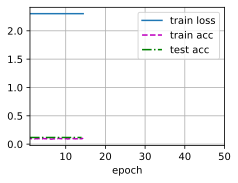

In [ ]:
d2l.train_ch6(net1, train_loader, test_loader, epochs, lr, d2l.try_gpu())

In [ ]:
net2.eval()

In [ ]:
test_dataset[0]

In [ ]:
test_batch = next(iter(test_loader))

In [ ]:
input_data = test_batch[0]

In [ ]:
net2.eval()
with torch.no_grad():
    output = net2(input_data)

In [ ]:
import numpy as np

In [ ]:
output_np = output.numpy()
predicted_label = np.argmax(output_np, axis=1)

In [ ]:
true_label = test_batch[1].numpy()
print("True label:      ", true_label)
print("Predicted label: ", predicted_label)